In [ ]:
#| include: false
#| default_exp motif
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
#%load_ext autoreload
#%autoreload 2

In [ ]:
#| export
from glycowork.motif.draw import *
from glycowork.motif.analysis import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
from glycowork.motif.processing import *
from glycowork.motif.query import *
from glycowork.motif.tokenization import *
from glycowork.glycan_data.loader import df_species

`motif` contains many functions to process glycans in various ways and use this processing to analyze glycans via curated motifs, graph features, and sequence features. It contains the following modules:

- `draw` contains the GlycoDraw function to draw glycans in SNFG style
- `analysis` contains functions for downstream analyses of important glycan motifs etc.
- `annotate` contains functions to extract curated motifs, graph features, and sequence features from glycan sequences
- `graph` is used to convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.
- `processing` contains all the basic functions to process IUPACcondensed glycan sequences into glycoletters etc. Also contains `get_lib` to construct the glycoletter library
- `query` is used to interact with the databases contained in glycowork, delivering insights for sequences of interest
- `tokenization` has helper functions to map m/z-->composition, composition-->structure, structure-->motif, and more

## draw
 >drawing glycans in SNFG style

In [ ]:
show_doc(GlycoDraw)

---

### GlycoDraw

>      GlycoDraw (draw_this, vertical=False, compact=False, show_linkage=True,
>                 dim=50, highlight_motif=None, highlight_termini_list=[],
>                 filepath=None)

Draws a glycan structure based on the provided input.

| Arguments:
| :-
| draw_this (string): The glycan structure or motif to be drawn.
| vertical (bool, optional): Set to True to draw the structure vertically. Default: False.
| compact (bool, optional): Set to True to draw the structure in a compact form. Default: False.
| show_linkage (bool, optional): Set to False to hide the linkage information. Default: True.
| dim (int, optional): The dimension (size) of the individual sugar units in the structure. Default: 50.
| highlight_motif (string, optional): Glycan motif to highlight within the parent structure.
| highlight_termini_list (list): list of monosaccharide positions (from 'terminal', 'internal', and 'flexible')
| filepath (string, optional): The path to the output file to save as SVG or PDF. Default: None.

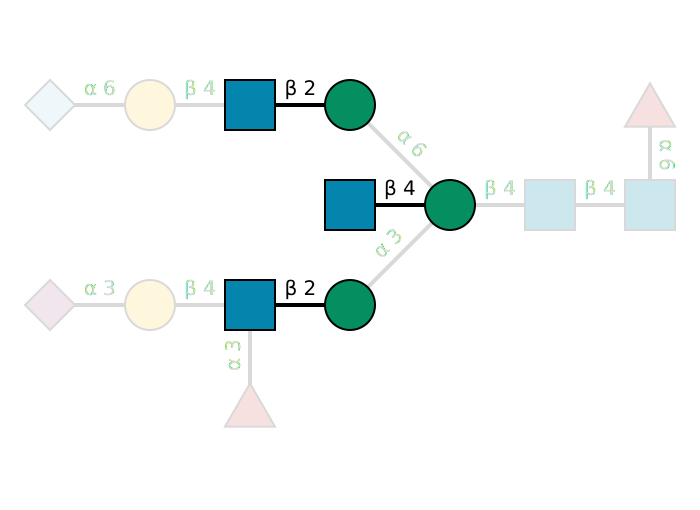

In [ ]:
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc",
         highlight_motif = "GlcNAc(b1-?)Man")

In [ ]:
show_doc(annotate_figure)

---

### annotate_figure

>      annotate_figure (svg_input, scale_range=(25, 80), compact=False,
>                       glycan_size='medium', filepath='', scale_by_DE_res=None,
>                       x_thresh=1, y_thresh=0.05, x_metric='Log2FC')

Modify matplotlib svg figure to replace text labels with glycan figures

| Arguments:
| :-
| svg_input (string): absolute path including full filename for input svg figure
| scale_range (tuple): tuple of two integers defining min/max glycan dim; default:(25,80)
| compact (bool): if True, draw compact glycan figures; default:False
| glycan_size (string): modify glycan size; default:'medium'; options are 'small', 'medium', 'large'
| filepath (string): absolute path including full filename allows for saving the plot
| scale_by_DE_res (df): result table from motif_analysis.get_differential_expression. Include to scale glycan figure size by -10logp
| x_thresh (float): absolute x metric threshold for datapoints included for scaling, set to match get_differential_expression; default:1.0
| y_thresh (float): corr p threshhold for datapoints included for scaling, set to match get_differential_expression; default:0.05
| x_metric (string): x-axis metric; default:'Log2FC'; options are 'Log2FC', 'Effect size'

| Returns:
| :-
| Modified figure svg code

## analysis
 >downstream analyses of important glycan motifs

In [ ]:
show_doc(get_pvals_motifs)

---

### get_pvals_motifs

>      get_pvals_motifs (df, glycan_col_name='glycan', label_col_name='target',
>                        thresh=1.645, sorting=True, feature_set=['exhaustive'],
>                        multiple_samples=False, motifs=None)

returns enriched motifs based on label data or predicted data

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences and labels [alternative: filepath to .csv]
| glycan_col_name (string): column name for glycan sequences; arbitrary if multiple_samples = True; default:'glycan'
| label_col_name (string): column name for labels; arbitrary if multiple_samples = True; default:'target'
| thresh (float): threshold value to separate positive/negative; default is 1.645 for Z-scores
| sorting (bool): whether p-value dataframe should be sorted ascendingly; default: True
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'exhaustive'; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs), and 'chemical' (molecular properties of glycan)
| multiple_samples (bool): set to True if you have multiple samples (rows) with glycan information (columns); default:False
| motifs (dataframe): can be used to pass a modified motif_list to the function; default:None

| Returns:
| :-
| Returns dataframe with p-values and corrected p-values for every glycan motif

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN',
          'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
test_df = pd.DataFrame({'glycan':glycans, 'binding':label})

print("Glyco-Motif enrichment p-value test")
out = get_pvals_motifs(test_df, 'glycan', 'binding').iloc[:10,:]

Glyco-Motif enrichment p-value test


In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,motif,pval,corr_pval
4,GlcNAc,0.013469,0.370702
8,Man,0.025198,0.370702
25,Man(a1-?)Man,0.030057,0.370702
10,Man(a1-3)Man,0.046055,0.377201
11,Man(a1-6)Man,0.091752,0.377201
13,Man(b1-4)GlcNAc,0.091752,0.377201
14,GlcNAc(b1-4)GlcNAc,0.091752,0.377201
27,Man(b1-?)GlcNAc,0.091752,0.377201
28,GlcNAc(b1-?)GlcNAc,0.091752,0.377201
16,Man(a1-2)Man,0.130826,0.484056


In [ ]:
show_doc(get_representative_substructures)

---

### get_representative_substructures

>      get_representative_substructures (enrichment_df, libr=None)

builds minimal glycans that contain enriched motifs from get_pvals_motifs

| Arguments:
| :-
| enrichment_df (dataframe): output from get_pvals_motifs
| libr (dict): dictionary of form glycoletter:index

| Returns:
| :-
| Returns up to 10 minimal glycans in a list

In [ ]:
show_doc(get_heatmap)

---

### get_heatmap

>      get_heatmap (df, mode='sequence', feature_set=['known'],
>                   datatype='response', rarity_filter=0.05, filepath='',
>                   index_col='glycan', **kwargs)

clusters samples based on glycan data (for instance glycan binding etc.)

| Arguments:
| :-
| df (dataframe): dataframe with glycan data, rows are samples and columns are glycans [alternative: filepath to .csv]
| mode (string): whether glycan 'sequence' or 'motif' should be used for clustering; default:sequence
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'exhaustive'; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs), and 'chemical' (molecular properties of glycan)
| datatype (string): whether df comes from a dataset with quantitative variable ('response') or from presence_to_matrix ('presence')
| rarity_filter (float): proportion of samples that need to have a non-zero value for a variable to be included; default:0.05
| filepath (string): absolute path including full filename allows for saving the plot
| index_col (string): default column to convert to dataframe index; default:'glycan'
| **kwargs: keyword arguments that are directly passed on to seaborn clustermap

| Returns:
| :-
| Prints clustermap

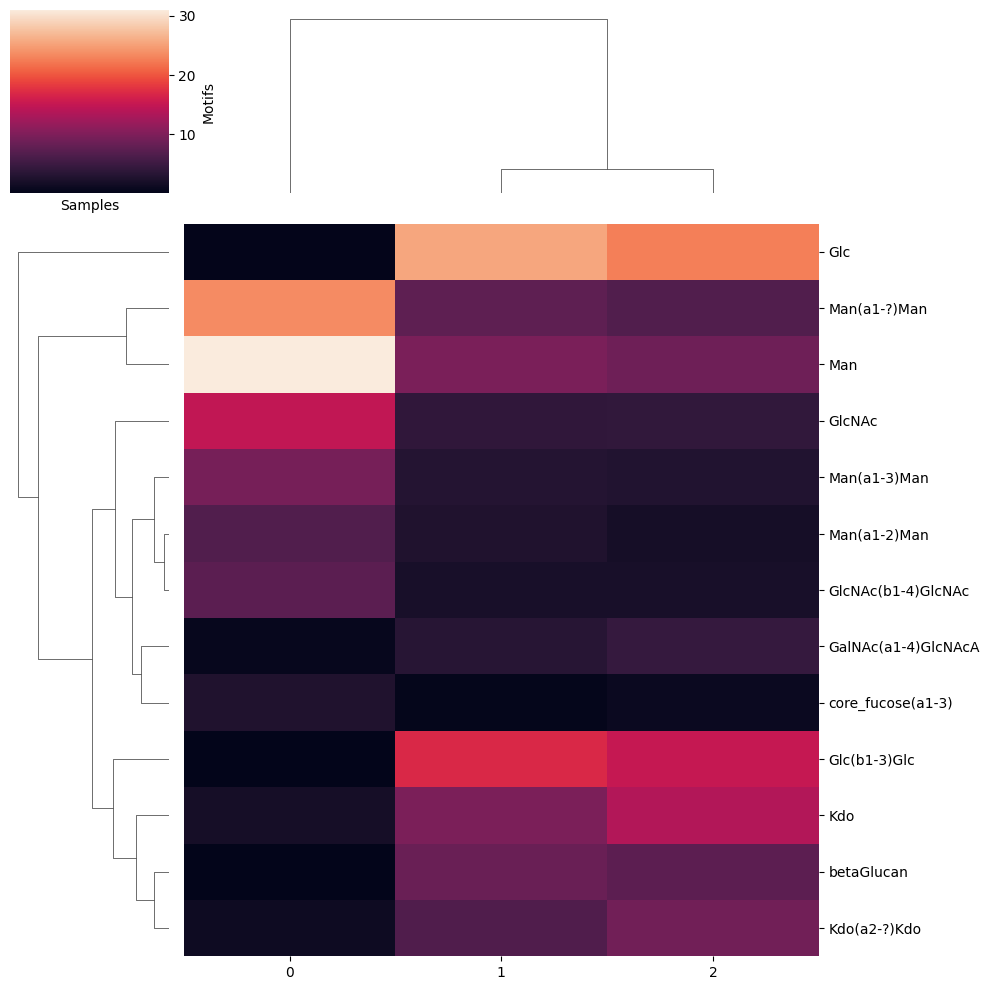

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P',
           'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
label2 = [0.134, 0.345, 1.15, 0.233, 2.981]
label3 = [0.334, 0.245, 1.55, 0.133, 2.581]
test_df = pd.DataFrame([label, label2, label3], columns = glycans)

get_heatmap(test_df, mode = 'motif', feature_set = ['known', 'exhaustive'])

In [ ]:
show_doc(plot_embeddings)

---

### plot_embeddings

>      plot_embeddings (glycans, emb=None, label_list=None, shape_feature=None,
>                       filepath='', alpha=0.8, palette='colorblind', **kwargs)

plots glycan representations for a list of glycans

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| emb (dictionary): stored glycan representations; default takes them from trained species-level SweetNet model
| label_list (list): list of same length as glycans if coloring of the plot is desired
| shape_feature (string): monosaccharide/bond used to display alternative shapes for dots on the plot
| filepath (string): absolute path including full filename allows for saving the plot
| alpha (float): transparency of points in plot; default:0.8
| palette (string): color palette to color different classes; default:'colorblind'
| **kwargs: keyword arguments that are directly passed on to matplotlib

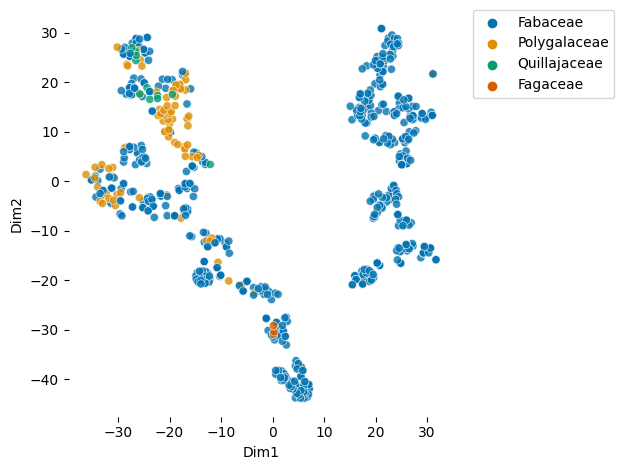

In [ ]:
df_fabales = df_species[df_species.Order == 'Fabales'].reset_index(drop = True)
plot_embeddings(df_fabales.glycan.values.tolist(), label_list = df_fabales.Family.values.tolist())

In [ ]:
show_doc(characterize_monosaccharide)

---

### characterize_monosaccharide

>      characterize_monosaccharide (sugar, df=None, mode='sugar',
>                                   glycan_col_name='glycan', rank=None,
>                                   focus=None, modifications=False,
>                                   filepath='', thresh=10)

for a given monosaccharide/linkage, return typical neighboring linkage/monosaccharide

| Arguments:
| :-
| sugar (string): monosaccharide or linkage
| df (dataframe): dataframe to use for analysis; default:df_species
| mode (string): either 'sugar' (connected monosaccharides), 'bond' (monosaccharides making a provided linkage), or 'sugarbond' (linkages that a provided monosaccharides makes); default:'sugar'
| glycan_col_name (string): column name under which glycans can be found; default:'glycan'
| rank (string): add column name as string if you want to filter for a group
| focus (string): add row value as string if you want to filter for a group
| modifications (bool): set to True if you want to consider modified versions of a monosaccharide; default:False
| filepath (string): absolute path including full filename allows for saving the plot
| thresh (int): threshold count of when to include motifs in plot; default:10 occurrences

| Returns:
| :-
| Plots modification distribution and typical neighboring bond/monosaccharide

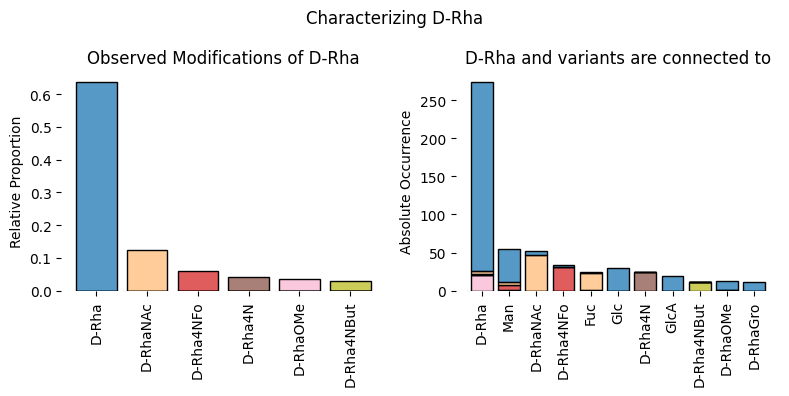

In [ ]:
characterize_monosaccharide('D-Rha', rank = 'Kingdom', focus = 'Bacteria', modifications = True)

In [ ]:
show_doc(get_differential_expression)

---

### get_differential_expression

>      get_differential_expression (df, group1, group2, motifs=False,
>                                   feature_set=['exhaustive', 'known'],
>                                   paired=False, impute=True, sets=False,
>                                   set_thresh=0.9, effect_size_variance=False,
>                                   min_samples=None)

Calculates differentially expressed glycans or motifs from glycomics data

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv]
| group1 (list): list of column indices or names for the first group of samples, usually the control
| group2 (list): list of column indices or names for the second group of samples
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is ['exhaustive','known']; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs), and 'chemical' (molecular properties of glycan)
| paired (bool): whether samples are paired or not (e.g., tumor & tumor-adjacent tissue from same patient); default:False
| impute (bool): replaces zeroes with draws from left-shifted distribution or KNN-Imputer; default:True
| sets (bool): whether to identify clusters of highly correlated glycans/motifs to test for differential expression; default:False
| set_thresh (float): correlation value used as a threshold for clusters; only used when sets=True; default:0.9
| effect_size_variance (bool): whether effect size variance should also be calculated/estimated; default:False
| min_samples (int): How many samples per group need to have non-zero values for glycan to be kept; default: at least half per group

| Returns:
| :-
| Returns a dataframe with:
| (i) Differentially expressed glycans/motifs/sets
| (ii) Their mean abundance across all samples in group1 + group2
| (iii) Log2-transformed fold change of group2 vs group1 (i.e., negative = lower in group2)
| (iv) Uncorrected p-values (Welch's t-test) for difference in mean
| (v) Corrected p-values (Welch's t-test with Benjamini-Hochberg correction) for difference in mean
| (vi) Corrected p-values (Levene's test for equality of variances with Benjamini-Hochberg correction) for difference in variance
| (vii) Effect size as Cohen's d (sets=False) or Mahalanobis distance (sets=True)
| (viii) [only if effect_size_variance=True] Effect size variance

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P',
           'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
label2 = [2.952, 2.011, 0.456, 4.006, 0.0]
label3 = [3.88, 1.771, 0.811, 3.562, 0.073]
label4 = [0.134, 0.345, 1.15, 0.233, 2.981]
label5 = [0.334, 0.245, 1.55, 0.133, 2.581]
label6 = [0.234, 0.423, 1.733, 0.102, 2.108]
test_df = pd.DataFrame([glycans, label, label2, label3, label4, label5, label6]).T

res = get_differential_expression(test_df, group1 = [4,5,6], group2 = [1,2,3], motifs = True, impute = True)
res

,Glycan,Mean abundance,Log2FC,p-val,corr p-val,corr Levene p-val,Effect size
5,GlcNAc,9.568358,1.821492,2.258169e-07,0.000003,0.992023,77.959201
1,GlcNAc(b1-4)GlcNAc,4.784179,1.821492,8.712107e-06,0.000057,0.992023,25.668780
3,Man(a1-3)Man,6.132955,1.571033,1.714565e-04,0.000743,0.992023,19.790025
0,core_fucose(a1-3),1.736491,2.034940,4.670727e-04,0.001518,0.992023,8.567727
9,Man,20.097777,1.649306,6.544773e-04,0.001702,0.992023,12.084810
8,betaGlucan,3.903745,-4.190622,1.304940e-03,0.002827,0.992023,-6.926471
7,Man(a1-?)Man,15.313598,1.597658,2.144800e-03,0.003983,0.992023,11.872141
10,Kdo,7.273855,-2.947483,3.326652e-03,0.005406,0.992023,-5.134787
11,Glc(b1-3)Glc,7.807490,-4.190622,3.748130e-03,0.005414,0.992023,-6.880723
6,Kdo(a2-?)Kdo,4.849236,-2.947483,5.683603e-03,0.007389,0.992023,-4.515115


In [ ]:
show_doc(get_volcano)

---

### get_volcano

>      get_volcano (df_res, y_thresh=0.05, x_thresh=1.0, label_changed=True,
>                   x_metric='Log2FC', filepath='')

Plots glycan differential expression results in a volcano plot

| Arguments:
| :-
| df_res (dataframe): output from get_differential_expression [alternative: filepath to .csv]
| y_thresh (float): corr p threshhold for labeling datapoints; default:0.05
| x_thresh (float): absolute x metric threshold for labeling datapoints; default:1.0
| label_changed (bool): if True, add text labels to significantly up- and downregulated datapoints; default:True
| x_metric (string): x-axis metric; default:'Log2FC'; options are 'Log2FC', 'Effect size'
| filepath (string): absolute path including full filename allows for saving the plot

| Returns:
| :-
| Prints volcano plot

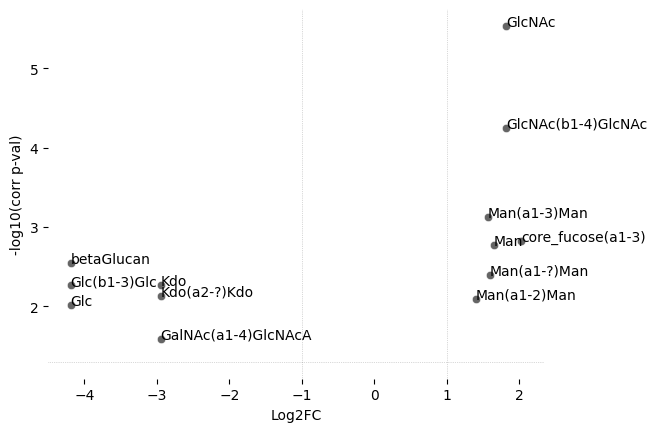

In [ ]:
get_volcano(res)

In [ ]:
show_doc(get_coverage)

---

### get_coverage

>      get_coverage (df, filepath='')

Plot glycan coverage across samples, ordered by average intensity

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv]
| filepath (string): absolute path including full filename allows for saving the plot

| Returns:
| :-
| Prints the heatmap

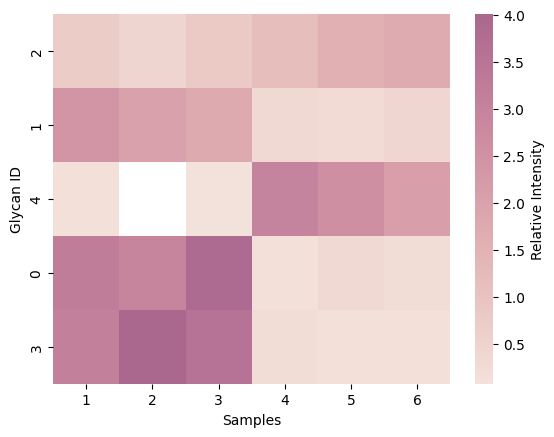

In [ ]:
test_df = pd.concat([test_df.iloc[:, 0], test_df[test_df.columns[1:]].astype(float)], axis = 1)

get_coverage(test_df)

In [ ]:
show_doc(get_pca)

---

### get_pca

>      get_pca (df, groups=None, motifs=False, feature_set=['known',
>               'exhaustive'], pc_x=1, pc_y=2, color=None, shape=None,
>               filepath='')

PCA plot from glycomics abundance dataframe

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv]
| groups (list): a list of group identifiers for each sample (e.g., [1,1,1,2,2,2,3,3,3]); default:None
|                     alternatively: design dataframe with 'id' column of samples names and additional columns with meta information
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is ['exhaustive','known']; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs), and 'chemical' (molecular properties of glycan)
| pc_x (int): principal component to plot on x axis; default:1
| pc_y (int): principal component to plot on y axis; default:2
| color (string): if design dataframe is provided: column name for color grouping; default:None
| shape (string): if design dataframe is provided: column name for shape grouping; default:None
| filepath (string): absolute path including full filename allows for saving the plot

| Returns:
| :-
| Prints PCA plot

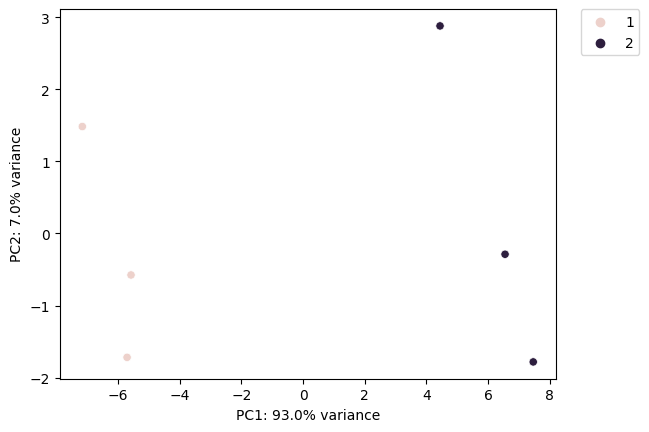

In [ ]:
get_pca(test_df, motifs = True, groups = [1,1,1,2,2,2])

In [ ]:
show_doc(get_pval_distribution)

---

### get_pval_distribution

>      get_pval_distribution (df_res, filepath='')

p-value distribution plot of glycan differential expression result

| Arguments:
| :-
| df_res (dataframe): output from get_differential_expression [alternative: filepath to .csv]
| filepath (string): absolute path including full filename allows for saving the plot

| Returns:
| :-
| prints p-value distribution plot

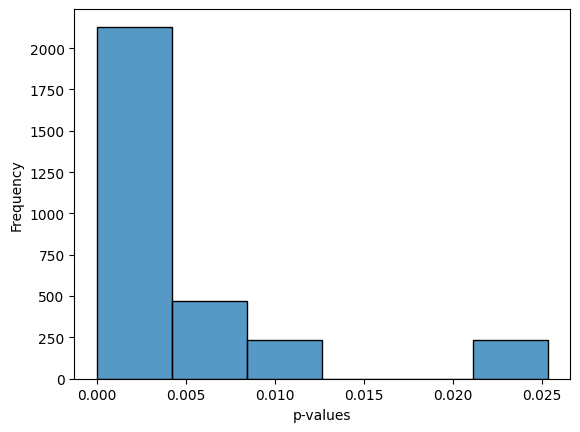

In [ ]:
get_pval_distribution(res)

In [ ]:
show_doc(get_ma)

---

### get_ma

>      get_ma (df_res, log2fc_thresh=1, sig_thresh=0.05, filepath='')

MA plot of glycan differential expression result

| Arguments:
| :-
| df_res (dataframe): output from get_differential_expression [alternative: filepath to .csv]
| log2fc_thresh (int): absolute Log2FC threshold for highlighting datapoints
| sig_thresh (int): significance threshold for highlighting datapoints
| filepath (string): absolute path including full filename allows for saving the plot

| Returns:
| :-
| prints MA plot

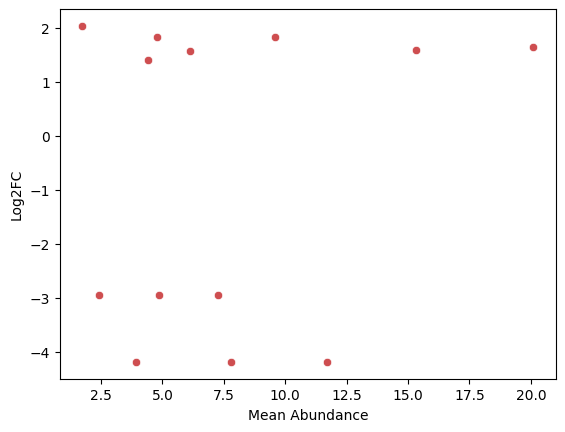

In [ ]:
get_ma(res)

In [ ]:
show_doc(get_glycanova)

---

### get_glycanova

>      get_glycanova (df, groups, impute=True, motifs=False,
>                     feature_set=['exhaustive', 'known'], min_samples=None,
>                     posthoc=True)

Calculate an ANOVA for each glycan (or motif) in the DataFrame

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv]
| group_sizes (list): a list of group identifiers for each sample (e.g., [1,1,1,2,2,2,3,3,3])
| impute (bool): replaces zeroes with draws from left-shifted distribution or KNN-Imputer; default:True
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is ['exhaustive','known']; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs), and 'chemical' (molecular properties of glycan)
| min_samples (int): How many samples per group need to have non-zero values for glycan to be kept; default: at least half per group
| posthoc (bool): whether to do Tukey's HSD test post-hoc to find out which differences were significant; default:True

| Returns:
| :-
| (i) a pandas DataFrame with an F statistic and corrected p-value for each glycan.
| (ii) a dictionary of type glycan : pandas DataFrame, with post-hoc results for each glycan with a significant ANOVA.

In [ ]:
test_df['label_7'] = [0.234, 0.023, 5.733, 8.102, 0.308]
test_df['label_8'] = [0.177, 0.009, 6.105, 5.549, 0.278]
test_df['label_9'] = [0.511, 0.011, 4.998, 7.005, 0.414]

anv, ph = get_glycanova(test_df, [1,1,1,2,2,2,3,3,3], motifs = True)
anv

,Glycan,F statistic,corr p-val
10,GlcNAc,738.401820,8.612836e-07
8,GlcNAc(b1-4)GlcNAc,475.040874,1.606505e-06
9,Man(a1-3)Man,290.166320,4.643481e-06
11,Man(a1-?)Man,123.854462,4.085754e-05
12,Man,116.771907,4.085754e-05
0,betaGlucan,80.365746,8.566874e-05
6,core_fucose(a1-3),79.325794,8.566874e-05
7,Man(a1-2)Man,77.007663,8.566874e-05
1,Glc(b1-3)Glc,69.647248,1.017202e-04
2,Glc,58.018566,1.544974e-04


In [ ]:
show_doc(get_meta_analysis)

---

### get_meta_analysis

>      get_meta_analysis (effect_sizes, variances, model='fixed', filepath='',
>                         study_names=[])

Fixed-effects model or random-effects model for meta-analysis of glycan effect sizes

| Arguments:
| :-
| effect_sizes (array-like): Effect sizes (e.g., Cohen's d) from each study
| variances (array-like): Corresponding effect size variances from each study
| model (string): Whether to use 'fixed' or 'random' effects model
| filepath (string): absolute path including full filename allows for saving the Forest plot
| study_names (list): list of strings indicating the name of each study

| Returns:
| :-
| (1) The combined effect size 
| (2) The p-value for the combined effect size

In [ ]:
get_meta_analysis([-8.759, -6.363, -5.199, -3.952],
                 [7.061, 4.041, 2.919, 1.968])

(-5.326913553837341, 3.005077298112724e-09)

In [ ]:
show_doc(get_time_series)

---

### get_time_series

>      get_time_series (df, impute=True, motifs=False, feature_set=['known',
>                       'exhaustive'], degree=1, min_samples=None)

Analyzes time series data of glycans using an OLS model

| Arguments:
| :-
| df (dataframe): dataframe containing sample IDs of style sampleID_UnitTimepoint_replicate (e.g., T1_h5_r1) in first column and glycan relative abundances in subsequent columns [alternative: filepath to .csv]
| impute (bool): replaces zeroes with draws from left-shifted distribution or KNN-Imputer; default:True
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is ['exhaustive','known']; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs), and 'chemical' (molecular properties of glycan)
| degree (int): degree of the polynomial for regression, default:1 for linear regression
| min_samples (int): How many samples per group need to have non-zero values for glycan to be kept; default: at least half per group

| Returns:
| :-
| Returns a dataframe with:
| (i) Glycans/motifs potentially exhibiting significant changes over time
| (ii) The slope of their expression curve over time
| (iii) Uncorrected p-values (t-test) for testing whether slope is significantly different from zero
| (iv) Corrected p-values (t-test with Benjamini-Hochberg correction) for testing whether slope is significantly different from zero

In [ ]:
t_dic = {}
t_dic["ID"] = ["D1_h5_r1", "D1_h5_r2", "D1_h5_r3", "D1_h10_r1", "D1_h10_r2", "D1_h10_r3", "D1_h15_r1", "D1_h15_r2", "D1_h15_r3"]
t_dic["Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc"] = [0.33, 0.31, 0.35, 1.51, 1.57, 1.66, 2.11, 2.04, 2.09]
t_dic["Fuc(a1-2)Gal(b1-3)GalNAc"] = [0.78, 1.01, 0.98, 0.88, 1.11, 0.72, 1.22, 1.00, 0.54]
get_time_series(pd.DataFrame(t_dic))

,Glycan,Change,p-val,corr p-val
1,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]Ga...,5.326852,0.002697,0.005394
0,Fuc(a1-2)Gal(b1-3)GalNAc,-2.030518,0.328428,0.328428


## annotate
>extract curated motifs, graph features, and sequence features from glycan sequences

In [ ]:
show_doc(annotate_glycan)

---

### annotate_glycan

>      annotate_glycan (glycan, motifs=None, libr=None, termini_list=[],
>                       gmotifs=None)

searches for known motifs in glycan sequence

| Arguments:
| :-
| glycan (string or networkx): glycan in IUPAC-condensed format (or as networkx graph) that has to contain a floating substituent
| motifs (dataframe): dataframe of glycan motifs (name + sequence); default:motif_list
| libr (dict): dictionary of form glycoletter:index
| termini_list (list): list of monosaccharide positions (from 'terminal', 'internal', and 'flexible')
| gmotifs (networkx): precalculated motif graphs for speed-up; default:None

| Returns:
| :-
| Returns dataframe with counts of motifs in glycan

In [ ]:
annotate_glycan("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

motif_name,Terminal_LewisX,Internal_LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,Terminal_LewisA,Internal_LewisA,LewisB,SialylLewisA,SulfoLewisA,...,Arabinogalactan_type1,Galactomannan,Tetraantennary_Nglycan,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core
Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(annotate_dataset)

---

### annotate_dataset

>      annotate_dataset (glycans, motifs=None, feature_set=['known'],
>                        termini_list=[], condense=False)

wrapper function to annotate motifs in list of glycans

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| motifs (dataframe): dataframe of glycan motifs (name + sequence); default:motif_list
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs), and 'chemical' (molecular properties of glycan)
| termini_list (list): list of monosaccharide/linkage positions (from 'terminal', 'internal', and 'flexible')
| condense (bool): if True, throws away columns with only zeroes; default:False

| Returns:
| :-                      
| Returns dataframe of glycans (rows) and presence/absence of known motifs (columns)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
print("Annotate Test")
out = annotate_dataset(glycans)

Annotate Test


In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

motif_name,Terminal_LewisX,Internal_LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,Terminal_LewisA,Internal_LewisA,LewisB,SialylLewisA,SulfoLewisA,H_type2,H_type1,A_antigen,B_antigen,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,Internal_LacNAc_type1,Terminal_LacNAc_type1,Internal_LacNAc_type2,Terminal_LacNAc_type2,Internal_LacdiNAc_type1,Terminal_LacdiNAc_type1,Internal_LacdiNAc_type2,Terminal_LacdiNAc_type2,bisectingGlcNAc,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series(LewisC),NeoLacto_Series,betaGlucan,KeratanSulfate,Hyluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,Sda,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Nglycolyl_GM2,Fuc_LN3,GT1b,GD1,GD1a_2,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,core_fucose(a1-3),GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose,Gala_series,LPS_core,Nglycan_complex,Nglycan_complex2,Oglycan_core1,Oglycan_core2,Oglycan_core3,Oglycan_core4,Oglycan_core5,Oglycan_core6,Oglycan_core7,Xylogalacturonan,Sialosylparagloboside,LDNF,OFuc,Arabinogalactan_type2,EGF_repeat,Nglycan_hybrid,Arabinan,Xyloglucan,Acharan_Sulfate,M3FX,M3X,1-6betaGalactan,Arabinogalactan_type1,Galactomannan,Tetraantennary_Nglycan,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core
Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(quantify_motifs)

---

### quantify_motifs

>      quantify_motifs (df, glycans, feature_set)

Extracts and quantifies motifs for a dataset

| Arguments:
| :-
| df (dataframe): dataframe containing relative abundances (each sample one column) [alternative: filepath to .csv]
| glycans(list): glycans as IUPAC-condensed strings
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is ['exhaustive','known']; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs), and 'chemical' (molecular properties of glycan)
| Returns:
| :-
| Returns a pandas DataFrame with motifs as columns and samples as rows

In [ ]:
quantify_motifs(test_df.iloc[:, 1:], test_df.iloc[:, 0].values.tolist(), ['known', 'exhaustive'])

,Chitobiose,Trimannosylcore,betaGlucan,core_fucose(a1-3),M3FX,Fuc,GalNAc,Glc,GlcN,GlcN4P,...,Man(b1-?)GlcNAc,GlcNAc(b1-?)GlcNAc,Fuc(a1-?)GlcNAc,GalNAc(a1-?)GlcNAcA,GlcNAcA(a1-?)Kdo,GlcN(b1-?)Kdo,Kdo(a2-?)Kdo,Kdo(a2-?)GlcN4P,GlcN4P(b1-?)GlcN4P,Glc(b1-?)Glc
1,8.759,8.759,0.108,3.234,3.234,3.234,0.733,0.324,0.733,1.466,...,8.759,8.759,3.234,0.733,0.733,0.733,1.466,0.733,0.733,0.216
2,8.969,8.969,0.000,2.952,2.952,2.952,0.456,0.000,0.456,0.912,...,8.969,8.969,2.952,0.456,0.456,0.456,0.912,0.456,0.456,0.000
3,9.213,9.213,0.073,3.880,3.880,3.880,0.811,0.219,0.811,1.622,...,9.213,9.213,3.880,0.811,0.811,0.811,1.622,0.811,0.811,0.146
4,0.712,0.712,2.981,0.134,0.134,0.134,1.150,8.943,1.150,2.300,...,0.712,0.712,0.134,1.150,1.150,1.150,2.300,1.150,1.150,5.962
5,0.712,0.712,2.581,0.334,0.334,0.334,1.550,7.743,1.550,3.100,...,0.712,0.712,0.334,1.550,1.550,1.550,3.100,1.550,1.550,5.162
6,0.759,0.759,2.108,0.234,0.234,0.234,1.733,6.324,1.733,3.466,...,0.759,0.759,0.234,1.733,1.733,1.733,3.466,1.733,1.733,4.216
label_7,8.359,8.359,0.308,0.234,0.234,0.234,5.733,0.924,5.733,11.466,...,8.359,8.359,0.234,5.733,5.733,5.733,11.466,5.733,5.733,0.616
label_8,5.735,5.735,0.278,0.177,0.177,0.177,6.105,0.834,6.105,12.210,...,5.735,5.735,0.177,6.105,6.105,6.105,12.210,6.105,6.105,0.556
label_9,7.527,7.527,0.414,0.511,0.511,0.511,4.998,1.242,4.998,9.996,...,7.527,7.527,0.511,4.998,4.998,4.998,9.996,4.998,4.998,0.828


In [ ]:
show_doc(get_k_saccharides)

---

### get_k_saccharides

>      get_k_saccharides (glycans, size=2, libr=None, up_to=False,
>                         just_motifs=False)

function to retrieve k-saccharides (default:disaccharides) occurring in a list of glycans

| Arguments:
| :-
| glycans (list): list of glycans in IUPAC-condensed nomenclature
| size (int): number of monosaccharides per -saccharide, default:2 (for disaccharides)
| libr (dict): dictionary of form glycoletter:index
| up_to (bool): in theory: include -saccharides up to size k; in practice: include monosaccharides; default:False
| just_motifs (bool): if you only want the motifs as a nested list, no dataframe with counts; default:False

| Returns:
| :-                 
| Returns dataframe with k-saccharide counts (columns) for each glycan (rows)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
out = get_k_saccharides(glycans, size = 3)

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,Man(a1-3)[Man(a1-6)]Man,Man(a1-3)[Xyl(b1-2)]Man,Man(a1-3)Man(b1-4)GlcNAc,Man(a1-6)[Xyl(b1-2)]Man,Man(a1-6)Man(b1-4)GlcNAc,Xyl(b1-2)Man(b1-4)GlcNAc,Man(b1-4)GlcNAc(b1-4)GlcNAc,GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,Man(a1-2)Man(a1-2)Man,Man(a1-2)Man(a1-3)Man,Man(a1-3)Man(a1-6)Man,GalNAc(a1-4)GlcNAcA(a1-4)Kdo,GlcNAcA(a1-4)[GlcN(b1-7)]Kdo,GlcNAcA(a1-4)Kdo(a2-5)Kdo,GlcN(b1-7)Kdo(a2-5)Kdo,]Kdo(a2-5)[Kdo(a2-4)]Kdo,Kdo(a2-5)Kdo(a2-6)GlcN4P,Kdo(a2-4)Kdo(a2-6)GlcN4P,Kdo(a2-6)GlcN4P(b1-6)GlcN4P,Man(a1-?)[Man(a1-?)]Man,Man(a1-?)[Xyl(b1-?)]Man,Man(a1-?)Man(b1-?)GlcNAc,Xyl(b1-?)Man(b1-?)GlcNAc,Man(b1-?)GlcNAc(b1-?)GlcNAc,GlcNAc(b1-?)[Fuc(a1-?)]GlcNAc,Man(a1-?)Man(a1-?)Man,GalNAc(a1-?)GlcNAcA(a1-?)Kdo,GlcNAcA(a1-?)[GlcN(b1-?)]Kdo,GlcNAcA(a1-?)Kdo(a2-?)Kdo,GlcN(b1-?)Kdo(a2-?)Kdo,]Kdo(a2-?)[Kdo(a2-?)]Kdo,Kdo(a2-?)Kdo(a2-?)GlcN4P,Kdo(a2-?)GlcN4P(b1-?)GlcN4P
0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,1,2,0,0,0,0,0,0,0,0,0,0,2,0,1,0,4,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,2,1


In [ ]:
show_doc(get_terminal_structures)

---

### get_terminal_structures

>      get_terminal_structures (glycan, libr=None)

returns terminal structures from all non-reducing ends (monosaccharide+linkage)

| Arguments:
| :-
| glycan (string or networkx): glycan in IUPAC-condensed nomenclature or as networkx graph
| libr (dict): dictionary of form glycoletter:index

| Returns:
| :-
| Returns a list of terminal structures (strings)

In [ ]:
get_terminal_structures("Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc")

['Neu5Ac(a2-3)', 'Neu5Ac(a2-6)']

In [ ]:
show_doc(get_molecular_properties)

---

### get_molecular_properties

>      get_molecular_properties (glycan_list, verbose=False, placeholder=False)

given a list of SMILES glycans, uses pubchempy to return various molecular parameters retrieved from PubChem

| Arguments:
| :-
| glycan_list (list): list of glycans in IUPAC-condensed
| verbose (bool): set True to print SMILES not found on PubChem; default:False
| placeholder (bool): whether failed requests should return dummy values or be dropped; default:False

| Returns:
| :-
| Returns a dataframe with all the molecular parameters retrieved from PubChem

In [ ]:
out = get_molecular_properties(["Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"])

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,undefined_bond_stereo_count,exact_mass,rotatable_bond_count,charge,h_bond_donor_count,xlogp,complexity,bond_stereo_count,tpsa,covalent_unit_count,defined_atom_stereo_count,molecular_weight,h_bond_acceptor_count,defined_bond_stereo_count,heavy_atom_count,monoisotopic_mass,atom_stereo_count,isotope_atom_count,undefined_atom_stereo_count
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,2222.7830048,43,0,39,-23.600000,4410,0,1070,1,56,2224.0,62,0,152,2222.7830048,57,0,1


## graph
>convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.

In [ ]:
show_doc(glycan_to_nxGraph)

---

### glycan_to_nxGraph

>      glycan_to_nxGraph (glycan, libr=None, termini='ignore',
>                         termini_list=None)

wrapper for converting glycans into networkx graphs; also works with floating substituents

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| libr (dict): dictionary of form glycoletter:index
| termini (string): whether to encode terminal/internal position of monosaccharides, 'ignore' for skipping, 'calc' for automatic annotation, or 'provided' if this information is provided in termini_list; default:'ignore'
| termini_list (list): list of monosaccharide positions (from 'terminal','internal', and 'flexible')

| Returns:
| :-
| Returns networkx graph object of glycan

In [ ]:
print('Glycan to networkx Graph (only edges printed)')
print(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc').edges())

Glycan to networkx Graph (only edges printed)
[(0, 1), (1, 4), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 10), (8, 9), (9, 10)]


In [ ]:
show_doc(graph_to_string)

---

### graph_to_string

>      graph_to_string (graph)

converts glycan graph back to IUPAC-condensed format

| Arguments:
| :-
| graph (networkx object): glycan graph

| Returns:
| :-
| Returns glycan in IUPAC-condensed format (string)

In [ ]:
graph_to_string(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

In [ ]:
show_doc(compare_glycans)

---

### compare_glycans

>      compare_glycans (glycan_a, glycan_b, libr=None, wildcards_ptm=False)

returns True if glycans are the same and False if not

| Arguments:
| :-
| glycan_a (string or networkx object): glycan in IUPAC-condensed format or as a precomputed networkx object
| glycan_b (stringor networkx object): glycan in IUPAC-condensed format or as a precomputed networkx object
| libr (dict): dictionary of form glycoletter:index
| wildcards_ptm (bool): set to True to allow modification wildcards (e.g., 'OS' matching with '6S'), only works when strings are provided; default:False

| Returns:
| :-
| Returns True if two glycans are the same and False if not

In [ ]:
print("Graph Isomorphism Test")
print(compare_glycans('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                      'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

Graph Isomorphism Test
True


In [ ]:
show_doc(subgraph_isomorphism)

---

### subgraph_isomorphism

>      subgraph_isomorphism (glycan, motif, libr=None, termini_list=[],
>                            count=False, wildcards_ptm=False,
>                            return_matches=False)

returns True if motif is in glycan and False if not

| Arguments:
| :-
| glycan (string or networkx): glycan in IUPAC-condensed format or as graph in NetworkX format
| motif (string or networkx): glycan motif in IUPAC-condensed format or as graph in NetworkX format
| libr (dict): dictionary of form glycoletter:index
| termini_list (list): list of monosaccharide positions (from 'terminal', 'internal', and 'flexible')
| count (bool): whether to return the number or absence/presence of motifs; default:False
| wildcards_ptm (bool): set to True to allow modification wildcards (e.g., 'OS' matching with '6S'), only works when strings are provided; default:False
| return_matches (bool): whether the matched subgraphs in input glycan should be returned as node lists as an additional output; default:False

| Returns:
| :-
| Returns True if motif is in glycan and False if not

In [ ]:
print("Subgraph Isomorphism Test")
print(subgraph_isomorphism('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                           'Fuc(a1-6)GlcNAc'))

Subgraph Isomorphism Test
True


In [ ]:
show_doc(generate_graph_features)

---

### generate_graph_features

>      generate_graph_features (glycan, glycan_graph=True, libr=None,
>                               label='network')

compute graph features of glycan

| Arguments:
| :-
| glycan (string or networkx object): glycan in IUPAC-condensed format (or glycan network if glycan_graph=False)
| glycan_graph (bool): True expects a glycan, False expects a network (from construct_network); default:True
| libr (dict): dictionary of form glycoletter:index
| label (string): Label to place in output dataframe if glycan_graph=False; default:'network'

| Returns:
| :-
| Returns a pandas dataframe with different graph features as columns and glycan as row

In [ ]:
generate_graph_features("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

,diameter,branching,nbrLeaves,avgDeg,varDeg,maxDeg,nbrDeg4,max_deg_leaves,mean_deg_leaves,deg_assort,...,flow_edgeMax,flow_edgeMin,flow_edgeAvg,flow_edgeVar,secorderMax,secorderMin,secorderAvg,secorderVar,egap,entropyStation
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,8,1,3,1.818182,0.330579,3.0,0,3.0,3.0,-1.850372e-15,...,0.333333,0.111111,0.217778,0.007289,45.607017,20.736441,31.679285,62.422895,0.026397,-2.35847


In [ ]:
show_doc(largest_subgraph)

---

### largest_subgraph

>      largest_subgraph (glycan_a, glycan_b, libr=None)

find the largest common subgraph of two glycans

| Arguments:
| :-
| glycan_a (string or networkx): glycan in IUPAC-condensed format or as networkx graph
| glycan_b (string or networkx): glycan in IUPAC-condensed format or as networkx graph
| libr (dict): dictionary of form glycoletter:index

| Returns:
| :-
| Returns the largest common subgraph as a string in IUPAC-condensed; returns empty string if there is no common subgraph

In [ ]:
glycan1 = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
glycan2 = 'Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
largest_subgraph(glycan1, glycan2)

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

In [ ]:
show_doc(ensure_graph)

---

### ensure_graph

>      ensure_graph (glycan, libr=None, **kwargs)

ensures function compatibility with string glycans and graph glycans

| Arguments:
| :-
| glycan (string or networkx graph): glycan in IUPAC-condensed format or as a networkx graph
| libr (dict): dictionary of form glycoletter:index
| **kwargs: keyword arguments that are directly passed on to glycan_to_nxGraph

| Returns:
| :-
| Returns networkx graph object of glycan

In [ ]:
ensure_graph("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

<networkx.classes.graph.Graph>

In [ ]:
show_doc(get_possible_topologies)

---

### get_possible_topologies

>      get_possible_topologies (glycan, libr=None, exhaustive=False)

creates possible glycans given a floating substituent; only works with max one floating substituent

| Arguments:
| :-
| glycan (string or networkx): glycan in IUPAC-condensed format or as networkx graph
| libr (dict): dictionary of form glycoletter:index
| exhaustive (bool): whether to also allow additions at internal positions; default:False

| Returns:
| :-
| Returns list of NetworkX-like glycan graphs of possible topologies

In [ ]:
show_doc(possible_topology_check)

---

### possible_topology_check

>      possible_topology_check (glycan, glycans, libr=None, exhaustive=False,
>                               **kwargs)

checks whether glycan with floating substituent could match glycans from a list; only works with max one floating substituent

| Arguments:
| :-
| glycan (string or networkx): glycan in IUPAC-condensed format (or as networkx graph) that has to contain a floating substituent
| glycans (list): list of glycans in IUPAC-condensed format (or networkx graphs; should not contain floating substituents)
| libr (dict): dictionary of form glycoletter:index
| exhaustive (bool): whether to also allow additions at internal positions; default:False
| **kwargs: keyword arguments that are directly passed on to compare_glycans

| Returns:
| :-
| Returns list of glycans that could match input glycan

In [ ]:
possible_topology_check("{Neu5Ac(a2-3)}Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc",
                       ["Fuc(a1-2)Gal(b1-3)GalNAc", "Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc",
                       "Neu5Ac(a2-6)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc"])

['Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc']

## processing
>process IUPAC-condensed glycan sequences into glycoletters etc.

In [ ]:
show_doc(min_process_glycans)

---

### min_process_glycans

>      min_process_glycans (glycan_list)

converts list of glycans into a nested lists of glycoletters

| Arguments:
| :-
| glycan_list (list): list of glycans in IUPAC-condensed format as strings

| Returns:
| :-
| Returns list of glycoletter lists

In [ ]:
min_process_glycans(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

[['Man', 'a1-3', 'Man', 'a1-6', 'Man', 'b1-4', 'GlcNAc', 'b1-4', 'GlcNAc'],
 ['Man',
  'a1-2',
  'Man',
  'a1-3',
  'Man',
  'a1-6',
  'Man',
  'b1-4',
  'GlcNAc',
  'b1-4',
  'GlcNAc']]

In [ ]:
show_doc(get_lib)

---

### get_lib

>      get_lib (glycan_list)

returns dictionary of form glycoletter:index

| Arguments:
| :-
| glycan_list (list): list of IUPAC-condensed glycan sequences as strings

| Returns:
| :-
| Returns dictionary of form glycoletter:index

In [ ]:
get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

{'GlcNAc': 0, 'Man': 1, 'a1-2': 2, 'a1-3': 3, 'a1-6': 4, 'b1-4': 5}

In [ ]:
show_doc(expand_lib)

---

### expand_lib

>      expand_lib (libr, glycan_list)

updates libr with newly introduced glycoletters

| Arguments:
| :-
| libr (dict): dictionary of form glycoletter:index
| glycan_list (list): list of IUPAC-condensed glycan sequences as strings

| Returns:
| :-
| Returns new lib

In [ ]:
lib1 = get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])
lib2 = expand_lib(lib1, ['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'])
lib2

{'GlcNAc': 0, 'Man': 1, 'a1-2': 2, 'a1-3': 3, 'a1-6': 4, 'b1-4': 5, 'Fuc': 6}

In [ ]:
show_doc(presence_to_matrix)

---

### presence_to_matrix

>      presence_to_matrix (df, glycan_col_name='glycan',
>                          label_col_name='Species')

converts a dataframe such as df_species to absence/presence matrix

| Arguments:
| :-
| df (dataframe): dataframe with glycan occurrence, rows are glycan-label pairs
| glycan_col_name (string): column name under which glycans are stored; default:glycan
| label_col_name (string): column name under which labels are stored; default:Species

| Returns:
| :-
| Returns pandas dataframe with labels as rows and glycan occurrences as columns

In [ ]:
out = presence_to_matrix(df_species[df_species.Order == 'Fabales'].reset_index(drop = True),
                         label_col_name = 'Family')

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

In [ ]:
show_doc(choose_correct_isoform)

---

### choose_correct_isoform

>      choose_correct_isoform (glycans, reverse=False)

given a list of glycan branch isomers, this function returns the correct isomer

| Arguments:
| :-
| glycans (list): glycans in IUPAC-condensed nomenclature
| reverse (bool): whether to return the correct isomer (False) or everything except the correct isomer (True); default:False

| Returns:
| :-
| Returns the correct isomer as a string (if reverse=False; otherwise it returns a list of strings)

In [ ]:
choose_correct_isoform(["Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc",
                        "Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"])

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

In [ ]:
show_doc(enforce_class)

---

### enforce_class

>      enforce_class (glycan, glycan_class, conf=None, extra_thresh=0.3)

given a glycan and glycan class, determines whether glycan is from this class

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed nomenclature
| glycan_class (string): glycan class in form of "O", "N", "free", or "lipid"
| conf (float): prediction confidence; can be used to override class
| extra_thresh (float): threshold to override class; default:0.3

| Returns:
| :-
| Returns True if glycan is in glycan class and False if not

In [ ]:
enforce_class("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", "O")

False

In [ ]:
show_doc(IUPAC_to_SMILES)

---

### IUPAC_to_SMILES

>      IUPAC_to_SMILES (glycan_list)

given a list of IUPAC-condensed glycans, uses GlyLES to return a list of corresponding isomeric SMILES

| Arguments:
| :-
| glycan_list (list): list of IUPAC-condensed glycans

| Returns:
| :-
| Returns a list of corresponding isomeric SMILES

In [ ]:
IUPAC_to_SMILES(['Neu5Ac(a2-3)Gal(b1-4)Glc'])

['O1C(O)[C@H](O)[C@@H](O)[C@H](O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O[C@]3(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([C@H](O)[C@H](O)CO)O3)[C@H]2O)[C@H]1CO']

In [ ]:
show_doc(canonicalize_composition)

---

### canonicalize_composition

>      canonicalize_composition (comp)

converts a composition from any common format into the dictionary that is optimized for glycowork

| Arguments:
| :-
| comp (string): composition formatted either in the style of HexNAc2Hex1Fuc3Neu5Ac1 or N2H1F3A1

| Returns:
| :-
| Returns composition as a dictionary of style monosaccharide : count

In [ ]:
print(canonicalize_composition("HexNAc2Hex1Fuc3Neu5Ac1"))
print(canonicalize_composition("N2H1F3A1"))

{'HexNAc': 2, 'Hex': 1, 'dHex': 3, 'Neu5Ac': 1}
{'HexNAc': 2, 'Hex': 1, 'dHex': 3, 'Neu5Ac': 1}


In [ ]:
show_doc(canonicalize_iupac)

---

### canonicalize_iupac

>      canonicalize_iupac (glycan)

converts a glycan from IUPAC-extended, LinearCode, GlycoCT, and WURCS into the exact IUPAC-condensed version that is optimized for glycowork

| Arguments:
| :-
| glycan (string): glycan sequence; some rare post-biosynthetic modifications could still be an issue

| Returns:
| :-
| Returns glycan as a string in canonicalized IUPAC-condensed

In [ ]:
print(canonicalize_iupac("NeuAc?1-36SGalb1-4GlcNACb1-6(Fuc?1-2Galb1-4GlcNacb1-3Galb1-3)GalNAc-sp3"))
print(canonicalize_iupac("WURCS=2.0/5,11,10/[a2122h-1b_1-5_2*NCC/3=O][a1122h-1b_1-5][a1122h-1a_1-5][a2112h-1b_1-5][a1221m-1a_1-5]/1-1-2-3-1-4-3-1-4-5-5/a4-b1_a6-k1_b4-c1_c3-d1_c6-g1_d2-e1_e4-f1_g2-h1_h4-i1_i2-j1"))
print(canonicalize_iupac("Ma3(Ma6)Mb4GNb4GN;N"))
print(canonicalize_iupac("α-D-Manp-(1→3)[α-D-Manp-(1→6)]-β-D-Manp-(1→4)-β-D-GlcpNAc-(1→4)-β-D-GlcpNAc-(1→"))
print(canonicalize_iupac("""RES
1b:b-dgal-HEX-1:5
2s:n-acetyl
3b:b-dgal-HEX-1:5
4b:b-dglc-HEX-1:5
5b:b-dgal-HEX-1:5
6b:a-dglc-HEX-1:5
7b:b-dgal-HEX-1:5
8b:a-lgal-HEX-1:5|6:d
9b:a-dgal-HEX-1:5
10s:n-acetyl
11s:n-acetyl
12b:b-dglc-HEX-1:5
13b:b-dgal-HEX-1:5
14b:a-lgal-HEX-1:5|6:d
15b:a-lgal-HEX-1:5|6:d
16s:n-acetyl
17s:n-acetyl
18b:b-dgal-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(3+1)3d
3:3o(3+1)4d
4:4o(-1+1)5d
5:5o(-1+1)6d
6:6o(-1+1)7d
7:7o(2+1)8d
8:7o(3+1)9d
9:9d(2+1)10n
10:6d(2+1)11n
11:5o(-1+1)12d
12:12o(-1+1)13d
13:13o(2+1)14d
14:12o(-1+1)15d
15:12d(2+1)16n
16:4d(2+1)17n
17:1o(6+1)18d
"""))

Fuc(a1-2)Gal(b1-4)GlcNAc(b1-3)Gal(b1-3)[Neu5Ac(a2-3)Gal6S(b1-4)GlcNAc(b1-6)]GalNAc
Fuc(a1-2)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-2)Gal(b1-?)[Fuc(a1-?)]GlcNAc(b1-?)[GalNAc(a1-3)[Fuc(a1-2)]Gal(b1-?)GlcNAc(a1-?)]Gal(b1-?)GlcNAc(b1-3)Gal(b1-3)[Gal(b1-6)]GalNAc


In [ ]:
show_doc(get_possible_linkages)

---

### get_possible_linkages

>      get_possible_linkages (wildcard, linkage_list={'1-4', 'b1-3', 'b2-2',
>                             'b2-4', '?2-6', 'a1-9', 'a2-3', 'a2-5', 'a1-8',
>                             '?1-2', 'b1-6', '?2-3', 'a1-11', 'a2-6', 'a1-7',
>                             'b1-1', 'a1-5', 'b1-5', 'b2-7', '?1-6', 'b2-8',
>                             'a2-8', 'b1-7', 'a2-11', '?1-3', 'b1-?', 'a1-2',
>                             'a1-?', 'a2-4', 'b2-1', 'b2-6', 'a2-7', 'a2-9',
>                             'b1-8', 'a1-4', '?1-4', 'b2-3', 'a1-6', 'a2-2',
>                             'a2-?', 'b1-9', 'a2-1', 'b1-4', '?2-?', 'b1-2',
>                             '?2-8', 'a1-1', 'a1-3', 'b2-5', '?1-?', '1-6'},
>                             libr=None)

Retrieves all linkages that match a given wildcard pattern from a list of linkages

| Arguments:
| :-
| wildcard (string): The pattern to match, where '?' can be used as a wildcard for any single character.
| linkage_list (list): List of linkages as strings to search within; default:linkages
| libr (dict): dictionary of form glycoletter:index

| Returns:
| :-
| Returns a list of linkages that match the wildcard pattern.

In [ ]:
get_possible_linkages("a1-?")

['a1-9',
 'a1-8',
 'a1-7',
 'a1-5',
 'a1-2',
 'a1-?',
 'a1-4',
 'a1-6',
 'a1-1',
 'a1-3']

In [ ]:
show_doc(get_possible_monosaccharides)

---

### get_possible_monosaccharides

>      get_possible_monosaccharides (wildcard, libr=None)

Retrieves all matching common monosaccharides of a type, given the type

| Arguments:
| :-
| wildcard (string): Monosaccharide type, from "HexNAc", "Hex", "dHex", "Sia", "HexA", "Pen"
| libr (dict): dictionary of form glycoletter:index

| Returns:
| :-
| Returns a list of specified monosaccharides of that type

In [ ]:
get_possible_monosaccharides("HexNAc")

['ManNAc', 'GlcNAc', 'HexNAc', 'GalNAc']

## query
>for interacting with the databases contained in glycowork, delivering insights for sequences of interest

In [ ]:
show_doc(get_insight)

---

### get_insight

>      get_insight (glycan, libr=None, motifs=None)

prints out meta-information about a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| libr (dict): dictionary of form glycoletter:index
| motifs (dataframe): dataframe of glycan motifs (name + sequence); default:motif_list

In [ ]:
print("Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'")
get_insight('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')

Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
Let's get rolling! Give us a few moments to crunch some numbers.

This glycan occurs in the following species: ['Acanthocheilonema_viteae', 'Aedes_aegypti', 'Angiostrongylus_cantonensis', 'Anopheles_gambiae', 'Antheraea_pernyi', 'Apis_mellifera', 'Ascaris_suum', 'Autographa_californica_nucleopolyhedrovirus', 'AvianInfluenzaA_Virus', 'Bombus_ignitus', 'Bombyx_mori', 'Bos_taurus', 'Brugia_malayi', 'Caenorhabditis_elegans', 'Cardicola_forsteri', 'Cooperia_onchophora', 'Cornu_aspersum', 'Crassostrea_gigas', 'Crassostrea_virginica', 'Cricetulus_griseus', 'Danio_rerio', 'Dictyocaulus_viviparus', 'Dirofilaria_immitis', 'Drosophila_melanogaster', 'Fasciola_hepatica', 'Gallus_gallus', 'Glossina_morsitans', 'Haemonchus_contortus', 'Haliotis_tuberculata', 'Heligmosomoides_polygyrus', 'Helix_lucorum', 'Homo_sapiens', 'HumanImmunoDeficiency_Virus', 'Hylesia_metabus', 'Lutzomyia_longipalpis', 'Lymantria_dispar', 'Mame

In [ ]:
show_doc(glytoucan_to_glycan)

---

### glytoucan_to_glycan

>      glytoucan_to_glycan (ids, revert=False)

interconverts GlyTouCan IDs and glycans in IUPAC-condensed

| Arguments:
| :-
| ids (list): list of GlyTouCan IDs as strings (if using glycans instead, change 'revert' to True
| revert (bool): whether glycans should be mapped to GlyTouCan IDs or vice versa; default:False

| Returns:
| :-
| Returns list of either GlyTouCan IDs or glycans in IUPAC-condensed

In [ ]:
glytoucan_to_glycan(['G59003TN', 'G88185OE'])

These IDs are not in our database: ['G59003TN', 'G88185OE']


['G59003TN', 'G88185OE']

## tokenization
>helper functions to map m/z-->composition, composition-->structure, structure-->motif, and more

In [ ]:
show_doc(string_to_labels)

---

### string_to_labels

>      string_to_labels (character_string, libr=None)

tokenizes word by indexing characters in passed library

| Arguments:
| :-
| character_string (string): string of characters to index
| libr (dict): dict of library items

| Returns:
| :-
| Returns indexes of characters in library

In [ ]:
string_to_labels(['Man','a1-3','Man','a1-6','Man'])

[1782, 2318, 1782, 2321, 1782]

In [ ]:
show_doc(pad_sequence)

---

### pad_sequence

>      pad_sequence (seq, max_length, pad_label=None, libr=None)

brings all sequences to same length by adding padding token

| Arguments:
| :-
| seq (list): sequence to pad (from string_to_labels)
| max_length (int): sequence length to pad to
| pad_label (int): which padding label to use
| libr (list): list of library items

| Returns:
| :-
| Returns padded sequence

In [ ]:
pad_sequence(string_to_labels(['Man','a1-3','Man','a1-6','Man']), 7)

[1782, 2318, 1782, 2321, 1782, 2415, 2415]

In [ ]:
show_doc(stemify_glycan)

---

### stemify_glycan

>      stemify_glycan (glycan, stem_lib=None, libr=None)

removes modifications from all monosaccharides in a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| stem_lib (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib
| libr (dict): dictionary of form glycoletter:index; default:lib

| Returns:
| :-
| Returns stemmed glycan as string

In [ ]:
stemify_glycan("Neu5Ac9Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc'

In [ ]:
show_doc(stemify_dataset)

---

### stemify_dataset

>      stemify_dataset (df, stem_lib=None, libr=None, glycan_col_name='glycan',
>                       rarity_filter=1)

stemifies all glycans in a dataset by removing monosaccharide modifications

| Arguments:
| :-
| df (dataframe): dataframe with glycans in IUPAC-condensed format in column glycan_col_name
| stem_lib (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib
| libr (dict): dictionary of form glycoletter:index; default:lib
| glycan_col_name (string): column name under which glycans are stored; default:glycan
| rarity_filter (int): how often monosaccharide modification has to occur to not get removed; default:1

| Returns:
| :-
| Returns df with glycans stemified

In [ ]:
show_doc(mask_rare_glycoletters)

---

### mask_rare_glycoletters

>      mask_rare_glycoletters (glycans, thresh_monosaccharides=None,
>                              thresh_linkages=None)

masks rare monosaccharides and linkages in a list of glycans

| Arguments:
| :-
| glycans (list): list of glycans in IUPAC-condensed form
| thresh_monosaccharides (int): threshold-value for monosaccharides seen as "rare"; default:(0.001*len(glycans))
| thresh_linkages (int): threshold-value for linkages seen as "rare"; default:(0.03*len(glycans))

| Returns:
| :-
| Returns list of glycans in IUPAC-condensed with masked rare monosaccharides and linkages

In [ ]:
show_doc(mz_to_composition)

---

### mz_to_composition

>      mz_to_composition (mz_value, mode='negative', mass_value='monoisotopic',
>                         reduced=False, sample_prep='underivatized',
>                         mass_tolerance=0.5, kingdom='Animalia',
>                         glycan_class='N', df_use=None, filter_out=set())

Mapping a m/z value to a matching monosaccharide composition within SugarBase

| Arguments:
| :-
| mz_value (float): the actual m/z value from mass spectrometry
| mode (string): whether mz_value comes from MS in 'positive' or 'negative' mode; default:'negative'
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| reduced (bool): whether glycans are reduced at reducing end; default:False
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'
| mass_tolerance (float): how much deviation to tolerate for a match; default:0.5
| kingdom (string): taxonomic kingdom for choosing a subset of glycans to consider; default:'Animalia'
| glycan_class (string): which glycan class does the m/z value stem from, 'N', 'O', or 'lipid' linked glycans or 'free' glycans; default:'N'
| df_use (dataframe): species-specific glycan dataframe to use for mapping; default: df_glycan
| filter_out (set): set of monosaccharide types to ignore during composition finding; default:None

| Returns:
| :-
| Returns a list of matching compositions in dict form

In [ ]:
mz_to_composition(665.4, glycan_class='O', filter_out={'Kdn', 'P', 'HexA', 'Pen', 'HexN', 'Me', 'PCho', 'PEtN'},
                    reduced = True)

[{'dHex': 1, 'HexNAc': 2, 'Hex': 1, 'Neu5Ac': 1, 'Neu5Gc': 1}]

In [ ]:
show_doc(match_composition_relaxed)

---

### match_composition_relaxed

>      match_composition_relaxed (composition, glycan_class='N',
>                                 kingdom='Animalia', df_use=None,
>                                 reducing_end=None)

Given a coarse-grained monosaccharide composition (Hex, HexNAc, etc.), it returns all corresponding glycans

| Arguments:
| :-
| composition (dict): a dictionary indicating the composition to match (for example {"dHex": 1, "Hex": 1, "HexNAc": 1})
| glycan_class (string): which glycan class does the m/z value stem from, 'N', 'O', or 'lipid' linked glycans or 'free' glycans; default:N
| kingdom (string): taxonomic kingdom for choosing a subset of glycans to consider; default:'Animalia'
| df_use (dataframe): glycan dataframe for searching glycan structures; default:df_glycan

| Returns:
| :-
| Returns list of glycans matching composition in IUPAC-condensed

In [ ]:
match_composition_relaxed({"Hex":3, "HexNAc":2, "dHex":1}, glycan_class = 'O')

['Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(a1-3)Gal(a1-4)Gal(b1-3)[GlcNAc(b1-6)]GalNAc',
 'Gal(a1-3)GalNAc(a1-3)[Fuc(a1-2)]Gal(b1-3)Gal(b1-3)GalNAc',
 'Man(a1-6)Glc(a1-4)GlcNAc(b1-4)[Fuc(a1-2)]Gal(b1-3)GalNAc',
 'Gal(?1-?)Gal(b1-?)[Fuc(a1-?)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Gal(b1-3)[Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)]GalNAc',
 'Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-3)GalNAc',
 'Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc',
 'Fuc(a1-2)Gal(b1-?)GlcNAc(b1-3)Gal(b1-3)[Gal(b1-6)]GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)GlcNAc(b1-3)Gal(b1-3)GalNAc',
 'Fuc(a1-2)Gal(b1-3)Gal(b1-3)GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b1-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc',
 'Gal(b1-4)Gal(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]GalNAc',
 'Gal(b1-2)Gal(a1-3)[Fuc(a1-2)]Gal(b1-3)[GlcNAc(b1-6)]GalNAc',
 'Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]Gal(b1-3)GalNAc',
 'Fuc(a1

In [ ]:
show_doc(condense_composition_matching)

---

### condense_composition_matching

>      condense_composition_matching (matched_composition, libr=None)

Given a list of glycans matching a composition, find the minimum number of glycans characterizing this set

| Arguments:
| :-
| matched_composition (list): list of glycans matching to a composition
| libr (dict): dictionary of form glycoletter:index; default:lib

| Returns:
| :-
| Returns minimal list of glycans that match a composition

In [ ]:
match_comp = match_composition_relaxed({'Hex':1, 'HexNAc':1, 'Neu5Ac':1}, glycan_class = 'O')
print(match_comp)
condense_composition_matching(match_comp)

['Neu5Ac(a2-3)Gal(b1-3)GalNAc', 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-?)Gal(b1-3)GalNAc', '{Neu5Ac(a2-?)}Gal(b1-3)GalNAc', 'Neu5Ac(a2-3)[GalNAc(b1-4)]Gal', 'Neu5Ac(a2-3)Gal(b1-4)GalNAc', 'Neu5Ac(a2-6)Gal(b1-3)GalNAc', 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-?)Hex(?1-?)GalNAc', 'Gal(?1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(?1-?)GalNAc', 'Neu5Ac(a2-6)Gal(a1-3)GalNAc', 'Neu5Ac(a2-?)Gal(?1-3)GalNAc']


['Neu5Ac(a2-3)Gal(b1-3)GalNAc',
 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc',
 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc',
 '{Neu5Ac(a2-?)}Gal(b1-3)GalNAc',
 'Neu5Ac(a2-3)[GalNAc(b1-4)]Gal',
 'Neu5Ac(a2-3)Gal(b1-4)GalNAc',
 'Neu5Ac(a2-6)Gal(b1-3)GalNAc',
 'Neu5Ac(a2-?)Hex(?1-?)GalNAc',
 'Neu5Ac(a2-3)Gal(?1-?)GalNAc',
 'Neu5Ac(a2-6)Gal(a1-3)GalNAc']

In [ ]:
show_doc(mz_to_structures)

---

### mz_to_structures

>      mz_to_structures (mz_list, glycan_class, kingdom='Animalia',
>                        abundances=None, mode='negative',
>                        mass_value='monoisotopic', sample_prep='underivatized',
>                        mass_tolerance=0.5, reduced=False, df_use=None,
>                        filter_out=set(), libr=None, verbose=False)

wrapper function to map precursor masses to structures, condense them, and match them with relative intensities

| Arguments:
| :-
| mz_list (list): list of precursor masses
| glycan_class (string): which glycan class does the m/z value stem from, 'N', 'O', or 'lipid' linked glycans or 'free' glycans
| kingdom (string): taxonomic kingdom for choosing a subset of glycans to consider; default:'Animalia'
| abundances (dataframe): every row one composition (matching mz_list in order), every column one sample; default:pd.DataFrame([range(len(mz_list))]*2).T
| mode (string): whether mz_value comes from MS in 'positive' or 'negative' mode; default:'negative'
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'
| mass_tolerance (float): how much deviation to tolerate for a match; default:0.5
| reduced (bool): whether glycans are reduced at reducing end; default:False
| df_use (dataframe): species-specific glycan dataframe to use for mapping; default: df_glycan
| filter_out (set): set of monosaccharide types to ignore during composition finding; default:None
| libr (dict): dictionary of form glycoletter:index; default:lib
| verbose (bool): whether to print any non-matching compositions; default:False

| Returns:
| :-
| Returns dataframe of (matched structures) x (relative intensities)

In [ ]:
mz_to_structures([965.29], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,GlcA(b1-3)Gal(b1-3)[GlcNAc(b1-3)GlcNAc(b1-6)]G...,0


In [ ]:
show_doc(compositions_to_structures)

---

### compositions_to_structures

>      compositions_to_structures (composition_list, glycan_class='N',
>                                  kingdom='Animalia', abundances=None,
>                                  df_use=None, libr=None, verbose=False)

wrapper function to map compositions to structures, condense them, and match them with relative intensities

| Arguments:
| :-
| composition_list (list): list of composition dictionaries of the form {'Hex': 1, 'HexNAc': 1}
| glycan_class (string): which glycan class does the m/z value stem from, 'N', 'O', or 'lipid' linked glycans or 'free' glycans; default:N
| kingdom (string): taxonomic kingdom for choosing a subset of glycans to consider; default:'Animalia'
| abundances (dataframe): every row one composition (matching composition_list in order), every column one sample;default:pd.DataFrame([range(len(composition_list))]*2).T
| df_use (dataframe): glycan dataframe for searching glycan structures; default:df_glycan
| libr (dict): dictionary of form glycoletter:index; default:lib
| verbose (bool): whether to print any non-matching compositions; default:False

| Returns:
| :-
| Returns dataframe of (matched structures) x (relative intensities)

In [ ]:
compositions_to_structures([{'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1}], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
1,Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc,0
2,Neu5Ac(a2-8)Neu5Ac(a2-6)[Gal(b1-3)]GalNAc,0
3,Neu5Ac(a2-3)[Neu5Ac(a2-6)]Gal(b1-3)GalNAc,0


In [ ]:
compositions_to_structures(["H1N1A2"], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
1,Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc,0
2,Neu5Ac(a2-8)Neu5Ac(a2-6)[Gal(b1-3)]GalNAc,0
3,Neu5Ac(a2-3)[Neu5Ac(a2-6)]Gal(b1-3)GalNAc,0


In [ ]:
show_doc(structure_to_basic)

---

### structure_to_basic

>      structure_to_basic (glycan, libr=None)

converts a monosaccharide- and linkage-defined glycan structure to the base topology

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed nomenclature
| libr (dict): dictionary of form glycoletter:index

| Returns:
| :-
| Returns the glycan topology as a string

In [ ]:
structure_to_basic("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

'Neu5Ac(a2-?)HexOS(?1-?)[Neu5Ac(a2-?)]HexNAc'

In [ ]:
show_doc(glycan_to_composition)

---

### glycan_to_composition

>      glycan_to_composition (glycan, stem_libr=None)

maps glycan to its composition

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| stem_libr (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib

| Returns:
| :-
| Returns a dictionary of form "Monosaccharide" : count

In [ ]:
glycan_to_composition("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

{'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1, 'S': 1}

In [ ]:
show_doc(glycan_to_mass)

---

### glycan_to_mass

>      glycan_to_mass (glycan, mass_value='monoisotopic',
>                      sample_prep='underivatized', stem_libr=None)

given a glycan, calculates its theoretical mass; only allowed extra-modifications are methylation, sulfation, phosphorylation

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'
| stem_libr (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib

| Returns:
| :-
| Returns the theoretical mass of input glycan

In [ ]:
glycan_to_mass("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

1045.2903546

In [ ]:
show_doc(composition_to_mass)

---

### composition_to_mass

>      composition_to_mass (dict_comp, mass_value='monoisotopic',
>                           sample_prep='underivatized')

given a composition, calculates its theoretical mass; only allowed extra-modifications are methylation, sulfation, phosphorylation

| Arguments:
| :-
| dict_comp (dict): composition in form monosaccharide:count
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'

| Returns:
| :-
| Returns the theoretical mass of input composition

In [ ]:
composition_to_mass({'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1, 'S': 1})

1045.2903546

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()